# --------------------------------------- INITIALIZATION ---------------------------------------

# นำเข้า PYTHON PACKAGES

In [1]:
from glob import glob ## ใช้จัดการเรื่องการหา path,ไฟล์ต่างๆ >>> docs.python.org/3/library/glob.html
import rasterio as rio ## เป็นโมดูลที่ใช้จัดการกับภาพถ่ายดาวเทียมและภูมิศาสตร์ต่างๆ เพื่อสกัดข้อมูลเชิงตัวเลขจากข้อมูลรูปภาพ >>> rasterio.readthedocs.io
import numpy as np ## ใช้สำหรับการสร้างArrayหลายมิติ >>> numpy.org
import earthpy.plot as ep ## ใช้สำหรับการ plot ภาพ raster >>> earthpy.readthedocs.io
from skimage import io ## โมดูลสำหรับการจัดการเรื่องภาพ >>> scikit-image.org
import matplotlib.pyplot as plt ## โมดูลสำหรับการแสดงผลภาพและกราฟต่างๆ >>> matplotlib.org
from matplotlib.colors import ListedColormap ## สำหรับกำหนดขอบเขตสีที่ใช้ในการแสดงผลภาพ
import pandas as pd ## โมดูลที่จะช่วยจัดการข้อมูลต่างๆได้ง่ายขึ้น โดยทำให้อยู่ในรูปแบบตาราง(Data Frame)  >>> pandas.pydata.org
import seaborn as sns ## เป็นโมดูลที่เหมาะกับการแสดงกราฟฟิคในเชิงสถิติ >>> seaborn.pydata.org
###  โมดูลสำหรับการปรับขนาดข้อมูลตัวเลขก่อนการสร้างโมเดลคือการทำให้เป็นมาตรฐาน >>> scikit-learn.org
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler
###
from sklearn.model_selection import train_test_split ## การแบ่งจำนวนที่ใช้ทดสอบและฝึกฝน สำหรับ Hold-out Method >>> scikit-learn.org
from sklearn import metrics ## สำหรับสร้าง Confustion matrix >>> scikit-learn.org
from sklearn.metrics import classification_report ## รายละเอียดของผลการจำแนกของโมเดล >>> scikit-learn.org
from sklearn.metrics import accuracy_score ## สำหรับคำนวณความแม่นยำของการจำแนกของโมเดล >>> scikit-learn.org
from sklearn.model_selection import cross_val_score ## ใช้คำนวณผลการทดสอบ Cross-validation สำหรับ data set >>> scikit-learn.org
from sklearn.model_selection import StratifiedKFold ## สร้างการทดสอบ Cross-validation สำหรับ data set >>> scikit-learn.org
from sklearn.neighbors import KNeighborsClassifier ## การเรียกใช้อัลกอริทึม K-Nearest Neighbor >>> scikit-learn.org
from sklearn.ensemble import RandomForestClassifier ## การเรียกใช้อัลกอริทึม RandomForest >>> scikit-learn.org
from sklearn.svm import SVC ## การเรียกใช้อัลกอริทึม Support Vector Machine >>> scikit-learn.org
import lightgbm as lgb ## การเรียกใช้อัลกอริทึม Light Gradient Boosted Machine >>> lightgbm.readthedocs.io

import shap ## เพื่ออธิบายผลลัพธ์ของโมเดลการเรียนรู้ของเครื่อง โดยใช้ค่า Shapley เพื่อหาแนวโน้มของคุณลักษณะที่มีผลต่อการทำนายผล >>> shap.readthedocs.io
shap.initjs() ## เริ่มต้น Shap

import warnings ## โมดูลสำหรับจัดการเรื่องการแจ้งเตือนของ python kernel
warnings.filterwarnings(action='ignore') ## ปิดการแสดงการแจ้งเตือนทั้งหมดจากระบบ

# กำหนด PATH

In [2]:
SEC_1_POST_QPB_IMG_PATH = 'IMAGES/PB/1/' ## โฟลเดอร์ที่เก็บภาพ
SEC_2_POST_QPB_IMG_PATH = 'IMAGES/PB/2/' ## โฟลเดอร์ที่เก็บภาพ

SEC_1_POST_QPB = "R1_T47QPB_20210228T034701_" ## ชื่อไฟล์ในโฟลเดอร์
SEC_2_POST_QPB = "R2_T47QPB_20210228T034701_" ## ชื่อไฟล์ในโฟลเดอร์

SEC_1_POST_QPB_GROUNDTRUTH_PATH = "R1_T47QPB_20210228T034701_GT_20m.tif" #ชื่อไฟล์ภาพผลเฉลย
SEC_2_POST_QPB_GROUNDTRUTH_PATH = "R2_T47QPB_20210228T034701_GT_20m.tif" #ชื่อไฟล์ภาพผลเฉลย

SEC_1_POST_QPB_IMG_SET = glob(f'{SEC_1_POST_QPB_IMG_PATH }{SEC_1_POST_QPB}*B?*.tif') #ใช้ glob เพื่อรวบรวม pathและชื่อ ของไฟล์ที่กำหนด
SEC_2_POST_QPB_IMG_SET = glob(f'{SEC_2_POST_QPB_IMG_PATH }{SEC_2_POST_QPB}*B?*.tif') #ใช้ glob เพื่อรวบรวม pathและชื่อ ของไฟล์ที่กำหนด

SEC_1_POST_QPB_IMG_SET.sort() ## เรียงภาพตามลำดับ spectral band ของดาวเทียม sentinel-2
SEC_2_POST_QPB_IMG_SET.sort() ## เรียงภาพตามลำดับ spectral band ของดาวเทียม sentinel-2

# --------------------------------------- DATA ACQUISITION ---------------------------------------

# นำเข้าข้อมูลภาพด้วย Rasterio

In [3]:
SEC_1_POST_QPB_RASTER = np.array([]) ## สร้าง numpy array เพื่อไว้เก็บภาพที่แปลงเป็น raster ทั้งหมดแล้ว
SEC_2_POST_QPB_RASTER = np.array([]) ## สร้าง numpy array เพื่อไว้เก็บภาพที่แปลงเป็น raster ทั้งหมดแล้ว

SEC_1_BUFF = [] ## สร้าง list เพื่อเก็บข้อมูล raster ของแต่ละภาพ
SEC_2_BUFF = [] ## สร้าง list เพื่อเก็บข้อมูล raster ของแต่ละภาพ

for _ in SEC_1_POST_QPB_IMG_SET:
    with rio.open(_, 'r') as img: ## การใช้ rio อ่านภาพถ่ายดาวเทียมและแปลงเป็นเชิงตัวเลข
        SEC_1_BUFF.append(img.read(1))
        
for _ in SEC_2_POST_QPB_IMG_SET:
    with rio.open(_, 'r') as img: ## การใช้ rio อ่านภาพถ่ายดาวเทียมและแปลงเป็นเชิงตัวเลข
        SEC_2_BUFF.append(img.read(1))
        
SEC_1_POST_QPB_RASTER = np.stack(SEC_1_BUFF) ## นำ list ที่เก็บข้อมูล raster ของแต่ละภาพมาแปลงเป็น array หลายมิติ
SEC_2_POST_QPB_RASTER = np.stack(SEC_2_BUFF) ## นำ list ที่เก็บข้อมูล raster ของแต่ละภาพมาแปลงเป็น array หลายมิติ

Available_bands = [ 'Blue', 'Green', 'Red','VRE1','VRE2','VRE3', 'NIR', 'SWIR1', 'SWIR2'] ## list ของ band ที่ใช้ในงานเรียงตามลำดับ

# นำเข้าภาพผลเฉลย (Ground Truth)

In [4]:
SEC_1_POST_QPB_GROUNDTRUTH = io.imread( ## นำเข้าภาพถ่ายผลเฉลยด้วย Skimage
    SEC_1_POST_QPB_IMG_PATH + SEC_1_POST_QPB_GROUNDTRUTH_PATH, ## กำหนดที่อยู่ของไฟล์
    as_gray=True ## อ่านรูปภาพเป็นแบบ Gray Scale
) 
SEC_2_POST_QPB_GROUNDTRUTH = io.imread( ## นำเข้าภาพถ่ายผลเฉลยด้วย Skimage
    SEC_2_POST_QPB_IMG_PATH + SEC_2_POST_QPB_GROUNDTRUTH_PATH, ## กำหนดที่อยู่ของไฟล์
    as_gray=True ## อ่านรูปภาพเป็นแบบ Gray Scale
) 

SEC_1_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_1_POST_QPB_GROUNDTRUTH) ## แปลง List ให้เป็น Numpy Array
SEC_2_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_2_POST_QPB_GROUNDTRUTH) ## แปลง List ให้เป็น Numpy Array

intensity = 0.6 ## กำหนดความความเข้ม ตั้งแต่ 0 - 1 (0 คือเข้มที่สุด)

SEC_1_POST_QPB_GROUNDTRUTH_MASK = (SEC_1_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## เลือกเฉพาะ pixel ที่มีค่าความเข้มน้อยกว่าค่า intensity ที่กำหนด
SEC_2_POST_QPB_GROUNDTRUTH_MASK = (SEC_2_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## เลือกเฉพาะ pixel ที่มีค่าความเข้มน้อยกว่าค่า intensity ที่กำหนด

# --------------------------------------- DATA EXPLORATION ---------------------------------------

# แปลงข้อมูล Array เป็น DataFrame

### ข้อมูลภาพ

In [5]:
SEC_1_POST_QPB_DF =  np.moveaxis(SEC_1_POST_QPB_RASTER, 0, -1) ## เปลี่ยนมิติของ Array
SEC_2_POST_QPB_DF =  np.moveaxis(SEC_2_POST_QPB_RASTER, 0, -1) ## เปลี่ยนมิติของ Array

SEC_1_POST_QPB_DF = SEC_1_POST_QPB_DF.reshape(-1, 9) ## เปลี่ยนรูปร่างของ Array
SEC_2_POST_QPB_DF = SEC_2_POST_QPB_DF.reshape(-1, 9) ## เปลี่ยนรูปร่างของ Array

SEC_1_POST_QPB_DF = pd.DataFrame(SEC_1_POST_QPB_DF) ## แปลง Array เป็น DataFrame
SEC_2_POST_QPB_DF = pd.DataFrame(SEC_2_POST_QPB_DF) ## แปลง Array เป็น DataFrame

### ผลเฉลย

In [6]:
SEC_1_POST_QPB_GROUNDTRUTH_DF = SEC_1_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)
SEC_2_POST_QPB_GROUNDTRUTH_DF = SEC_2_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)

SEC_1_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_1_POST_QPB_GROUNDTRUTH_DF)
SEC_2_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_2_POST_QPB_GROUNDTRUTH_DF)

## เปลี่ยนชื่อ Feature

### ข้อมูลภาพ

In [7]:
for _ in range(0,len(Available_bands)): ## Loop เพื่อเปลี่ยนชื่อตาม list ของ band ที่กำหนดไว้ตอนแรก (Available_bands)
    SEC_1_POST_QPB_DF = SEC_1_POST_QPB_DF.rename(columns={_: Available_bands[_]})
    SEC_2_POST_QPB_DF = SEC_2_POST_QPB_DF.rename(columns={_: Available_bands[_]})

### ผลเฉลย

In [8]:
SEC_1_POST_QPB_GROUNDTRUTH_DF = SEC_1_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_2_POST_QPB_GROUNDTRUTH_DF = SEC_2_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})

# --------------------------------------- DATA PREPARATION ---------------------------------------

In [9]:
SEC_1_DF = SEC_1_POST_QPB_DF ## ข้อมูลภาพ
SEC_2_DF = SEC_2_POST_QPB_DF ## ข้อมูลภาพ

SEC_1_LABEL = SEC_1_POST_QPB_GROUNDTRUTH_DF ## ผลเฉลย
SEC_2_LABEL = SEC_2_POST_QPB_GROUNDTRUTH_DF ## ผลเฉลย

# สกัด Feature (Feature engineering)

## สกัด feature ใหม่จากค่าการสะท้อนของสเปกตรัมใน DataFrame

### ค่าดัชนีทางภูมิศาสตร์ (Geographical index) ที่คำนวณจากการนำค่าการสะท้อนของแต่ละคลื่นสเปกตรัม

In [10]:
SEC_1_DF['NDVI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_2_DF['NDVI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_1_DF['GNDVI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_2_DF['GNDVI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_1_DF['EVI'] = SEC_1_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_2_DF['EVI'] = SEC_2_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_1_DF['AVI'] = SEC_1_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_2_DF['AVI'] = SEC_2_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_1_DF['SAVI'] = SEC_1_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_2_DF['SAVI'] = SEC_2_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_1_DF['NDMI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_2_DF['NDMI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_1_DF['MSI'] = SEC_1_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_2_DF['MSI'] = SEC_2_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_1_DF['NBRI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_2_DF['NBRI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_1_DF['BSI'] = SEC_1_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_2_DF['BSI'] = SEC_2_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_1_DF['NDWI'] = SEC_1_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_2_DF['NDWI'] = SEC_2_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_1_DF['ARVI'] = SEC_1_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_2_DF['ARVI'] = SEC_2_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_1_DF['SIPI'] = SEC_1_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index
SEC_2_DF['SIPI'] = SEC_2_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

## รวมข้อมูลรูปภาพที่ใช้ฝึกฝนเข้าด้วยกันทั้งหมด

In [11]:
M_SEC_1_DF = pd.concat([SEC_1_DF, SEC_1_LABEL], ## รวมข้อมูลภาพกับผลเฉลยเข้าด้วยกัน
                   axis=1, ## รวมกันในลักษณะของคอลัมน์
                   sort=False ## ไม่เรียงข้อมูลใหม่
                  )

M_SEC_2_DF = pd.concat([SEC_2_DF, SEC_2_LABEL], ## รวมข้อมูลภาพกับผลเฉลยเข้าด้วยกัน
                   axis=1, ## รวมกันในลักษณะของคอลัมน์
                   sort=False ## ไม่เรียงข้อมูลใหม่
                  )

DF_SET = pd.concat([M_SEC_1_DF, M_SEC_2_DF])
DF_SET = DF_SET.reset_index(drop=True)

# ทำความสะอาดข้อมูล (DATA CLEANING)

## จัดการกับข้อมูลที่ไม่สามารถนำมาคำนวณได้

In [12]:
DF_SET = DF_SET.replace([np.inf, -np.inf], np.nan) ## หากมีค่าดังกล่าวให้แทนค่าด้วย nan

threshold = 50 ## กำหนดเปอร์เซ็นของค่า nan ที่ยอมรับได้

DF_SET = DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 <= threshold]] ## ลบคอลัมน์ที่มีค่า nan มากกว่าเกณฑ์ที่กำหนด
DF_SET = DF_SET.loc[DF_SET.isnull().mean(axis=1) <= threshold] ## ลบแถวที่มีค่า nan มากกว่าเกณฑ์ที่กำหนด

DF_SET = DF_SET.fillna(DF_SET.mean()) 

## จัดการกับค่าที่ผิดปกติ

In [13]:
LABEL = DF_SET[['Label']]
DF_SET = DF_SET.drop(columns=['Label'])

for _ in DF_SET.columns:
    for __ in ([_]):
        q75,q25 = np.percentile(DF_SET.loc[:,__],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        DF_SET.loc[DF_SET[__] < min,__] = np.nan
        DF_SET.loc[DF_SET[__] > max,__] = np.nan  
        
DF_SET = pd.concat([DF_SET, LABEL], axis=1, sort=False)

## กำจัดค่า Nan ที่มีจำนวนเกินกำหนดในแถวและคอลัมน์

In [14]:
threshold = 50 
DF_SET = DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 <= threshold]]
DF_SET = DF_SET.loc[DF_SET.isnull().mean(axis=1) <= threshold] 

## แทนค่า Nan ที่เหลือด้วยค่า Mean ของแต่ละ column

In [15]:
DF_SET = DF_SET.fillna(DF_SET.mean()) 

# จัดการความสมดุลของผลเฉลย (CLASSES BALANCING)

### ลดจำนวนของคำตอบที่มีมากกว่าลงให้เท่ากับจำนวนของคำตอบที่น้อยกว่า (DOWN SAMPLE)

In [16]:
DF_CLASS_1 = DF_SET.query("Label == 1") ## สร้าง DataFrame ใหม่โดยดึงมาแค่คำตอบที่เป็น burnt
DF_CLASS_0 = DF_SET.query("Label == 0").sample(n=len(DF_CLASS_1),random_state=1) ## สร้าง DataFrame ใหม่โดยดึงคำตอบแบบสุ่มที่เป็น unburn ในปริมาณที่เท่ากับคำตอบที่เป็น burnt

DF_SET = pd.concat([DF_CLASS_0, DF_CLASS_1])
DF_SET = DF_SET.sample(len(DF_CLASS_0)+len(DF_CLASS_1)) ## เรียงตำแหน่งแถวใหม่แบบสุ่ม
DF_SET = DF_SET.reset_index(drop=True) ## นับ Index ใหม่

# ทำให้ข้อมูลเป็นมาตราฐานเดียวกัน (DATA SCALING)

## แยกผลเฉลยออกจาก DataFrame

In [17]:
LABEL = DF_SET[['Label']]
DF_SET = DF_SET.drop(columns=['Label'])

## ทำให้ข้อมูลอยู่ในมตราฐานเดียวกันด้วย Scaler

In [18]:
#DF_SET_SCALED = RobustScaler().fit_transform(DF_SET) ## จัดการค่าที่ผิดปกติจากข้อมูลด้วย Robust Scaler

DF_SET_SCALED = StandardScaler().fit_transform(DF_SET) ## ปรับมาตราฐานข้อมูลด้วย Standard Scaler

#DF_SET_SCALED = MinMaxScaler().fit_transform(DF_SET) ## ปรับขอบเขตข้อมูลด้วย MinMax Scaler

NORM_DF_SET = pd.DataFrame(DF_SET_SCALED)
display(NORM_DF_SET)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.258066,1.817023,2.146479,1.952481,1.264077,1.152816,0.685997,1.609575,2.029903,-0.860748,-0.868799,-1.137143,-0.860392,-0.631548,0.638172,-0.742960,1.655782,0.868799,-1.012887,1.656671
1,-1.272157,-0.889989,-0.322239,0.304834,0.774363,0.998252,1.124686,0.667120,-0.317136,1.302405,1.725500,1.653475,1.317017,0.719235,-0.720298,1.112989,0.623607,-1.725500,1.238083,-0.905214
2,1.764110,1.400560,1.323573,0.854049,-0.009181,-0.470098,-0.442062,-0.027321,0.447016,-1.438067,-1.736391,-1.263316,-1.443065,-0.466581,0.449906,-0.659642,0.239879,1.736391,-1.247236,-0.432940
3,0.245977,0.567633,1.049271,1.403265,1.068191,0.998252,1.124686,1.758383,1.702409,0.241573,0.461714,-0.434590,0.249802,-0.288330,0.254257,-0.280920,1.603477,-0.461714,0.095451,-0.149385
4,-0.766112,-0.057062,-0.185088,0.716746,1.655849,1.693787,1.626046,1.113546,0.829092,1.507462,1.279078,1.184262,1.524676,0.787063,-0.778885,0.557917,1.137558,-1.279079,1.573933,-1.156323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,-0.766112,-0.681757,0.226365,0.716746,0.186705,0.302718,0.372647,0.270297,0.174105,0.265702,1.048800,0.282949,0.272282,0.284101,-0.324650,0.197980,0.264820,-1.048800,0.039363,-0.017110
19164,0.752021,0.359401,0.774969,0.579442,0.088762,0.148155,-0.066043,0.419105,0.774510,-0.598106,-0.351270,-0.774884,-0.597515,-0.430775,0.409971,-0.564995,0.420127,0.351270,-0.598334,0.651124
19165,-0.260068,-0.265294,-0.322239,-0.244382,-0.498895,-0.547379,-0.567402,-0.771364,-0.808377,-0.176477,-0.248153,0.088606,-0.175172,0.272889,-0.313979,0.258639,-0.713334,0.248153,-0.175472,-0.004176
19166,1.005044,0.775865,0.912120,0.579442,-0.009181,-0.006408,-0.128713,0.369502,0.883675,-0.771833,-0.805453,-0.906280,-0.772373,-0.462269,0.445079,-0.685769,0.420127,0.805452,-0.733762,0.900138


## เปลี่ยนชื่อ feature กลับ

In [19]:
Available_Features = list(DF_SET.columns) ## เก็บชื่อ feature จาก DataFrame ตั้งต้น
Available_Features

['Blue',
 'Green',
 'Red',
 'VRE1',
 'VRE2',
 'VRE3',
 'NIR',
 'SWIR1',
 'SWIR2',
 'NDVI',
 'GNDVI',
 'EVI',
 'SAVI',
 'NDMI',
 'MSI',
 'NBRI',
 'BSI',
 'NDWI',
 'ARVI',
 'SIPI']

In [20]:
for _ in range(0,len(Available_Features)): ## Loop เพื่อเปลี่ยนชื่อตาม list ของ band ที่กำหนดไว้ตอนแรก (Available_bands)
    NORM_DF_SET = NORM_DF_SET.rename(columns={_: Available_Features[_]})

NORM_DF_SET = pd.concat([NORM_DF_SET, LABEL], 
                   axis=1, 
                   sort=False 
                  )

# --------------------------------------- MODEL CREATION ---------------------------------------

### แยกผลเฉลยออกจาก DataFrame

In [21]:
_X = NORM_DF_SET.iloc[:, 0:len(NORM_DF_SET.columns)-1].values ## ข้อมูลที่ใช้ฝึกฝน
_Y = NORM_DF_SET.iloc[:, len(NORM_DF_SET.columns)-1].values ## ผลเฉลย

# >> CROSS-VALIDATION METHOD <<

In [22]:
cv = 10 ## กำหนด k-fold สำหรับการแบ่งสัดส่วนข้อมูล
Selected_model = [] ## สำหรับใช้เก็บโมเดลที่ต้องการใช้ทำนายผล

# K-Nearest Neighbor

### หาค่า K ที่ดีที่สุดโดยใช้ผลจาก Cross-validation

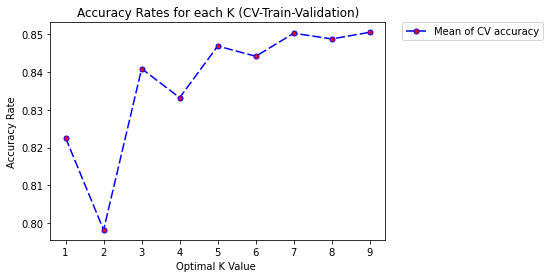

Optimal K Value is  9  with CV's score  85.05  %
>Standard deviation  0.008043221
>Best CV's score  85.05  %
>Average CV's score  83.73  %
>Worst CV's score  79.82  %


In [23]:
k_range = list(range(1,10))
scores_cv = []
std_cv = []

for _ in k_range:

    knn = KNeighborsClassifier(
        n_neighbors=_,
        metric = 'euclidean'
    )

    scores = cross_val_score(
        knn,
        _X,
        _Y,
        cv=cv
    )

    scores_cv.append(scores.mean())
    std_cv.append(scores.std())

plt.plot(k_range, scores_cv, 'y', dashes=[6, 2], label = "Mean of CV accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal K Value ')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each K (CV-Train-Validation)')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_K = _index+1

print('Optimal K Value is ',optimal_K,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### ฝึกฝนโมเดลอีกครั้งด้วยค่า K ที่ดีที่สุด

In [24]:
knn = KNeighborsClassifier( 
    n_neighbors=optimal_K,
    #n_neighbors=8,
    metric = 'euclidean'
)

knn_clf = knn.fit(_X, _Y)

### เลือกโมเดล KNN

In [25]:
knn_model = knn_clf

# RandomForest

In [26]:
rdf_estimator_num = 100
random_state = 42

### หาค่า Max-depth ที่ดีที่สุดโดยใช้ผลจาก Cross-validation

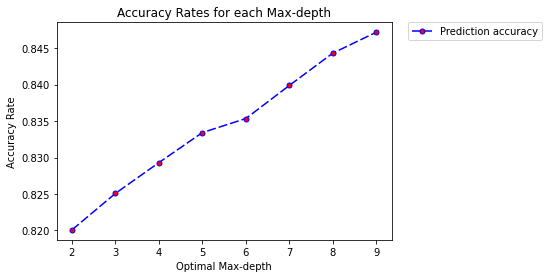

Optimal Max-depth is  9  with CV's score  84.72  %
>Standard deviation  0.009503444
>Best CV's score  84.72  %
>Average CV's score  83.43  %
>Worst CV's score  82.01  %


In [27]:
max_depth_range = list(range(2,10)) 
scores_cv = [] 
std_cv = []

for _ in max_depth_range:
    
    rdf=RandomForestClassifier(
        n_estimators=rdf_estimator_num,
        max_depth = _,
        random_state = random_state
    )

    scores = cross_val_score(
        rdf,
        _X,
        _Y,
        cv=cv
    )

    scores_cv.append(scores.mean())
    std_cv.append(scores.std())

plt.plot(max_depth_range, scores_cv, 'y', dashes=[6, 2], label = "Prediction accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal Max-depth')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each Max-depth')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_max_depth = _index+2

print('Optimal Max-depth is ',optimal_max_depth,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### ฝึกฝนโมเดลอีกครั้งด้วยค่า Max-depth ที่ดีที่สุด

In [28]:
rdf=RandomForestClassifier(
    n_estimators = rdf_estimator_num, 
    max_depth = optimal_max_depth, 
    #max_depth = 2, 
    random_state = random_state 
)

rdf_clf = rdf.fit(_X, _Y)

### เลือกโมเดล RandomForest

In [29]:
rdf_model = rdf_clf

# Support Vector Machine

### หาค่า C ที่ดีที่สุดโดยใช้ผลจาก Cross-validation

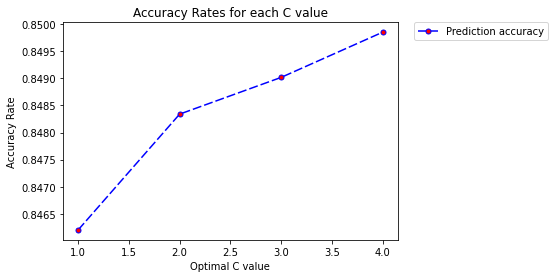

Optimal C value is  4  with CV's score  84.99  %
>Standard deviation  0.009836252
>Best CV's score  84.99  %
>Average CV's score  84.84  %
>Worst CV's score  84.62  %


In [30]:
regularization_range = list(range(1,5))
scores_cv = []
std_cv = []

for _ in regularization_range:
    
    svm=SVC(
        C=_,
    )

    scores = cross_val_score(
        svm,
        _X,
        _Y,
        cv=cv
    )

    scores_cv.append(scores.mean())
    std_cv.append(scores.std())

plt.plot(regularization_range, scores_cv, 'y', dashes=[6, 2], label = "Prediction accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal C value')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each C value')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_c = _index+1

print('Optimal C value is ',optimal_c,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### ฝึกฝนโมเดลอีกครั้งด้วยค่า C ที่ดีที่สุด

In [31]:
svm=SVC(
    C=optimal_c,
    #C=1,
) 

svm_clf = svm.fit(_X, _Y)

### เลือกโมเดล SVM

In [32]:
svm_model = svm_clf

# Light Gradient Boosted Machine

In [33]:
lgbm_learning_rate = 0.05
lgbm_epocs = 100 
num_class = len(set(_Y)) 
random_state = 42
params={}

params['verbose'] = -1 
params['learning_rate'] = lgbm_learning_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['max_depth'] = 100
params['random_state'] = random_state
params['num_class'] = num_class 

### หาค่า Max-depth ที่ดีที่สุดโดยใช้ผลจาก Cross-validation

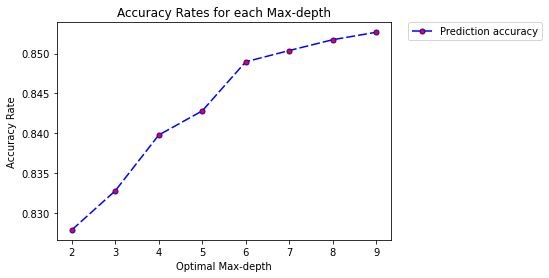

Optimal Max-depth is  9  with CV's score  85.27  %
>Standard deviation  0.005866203
>Best CV's score  85.27  %
>Average CV's score  84.34  %
>Worst CV's score  82.79  %


In [34]:
max_depth_range = list(range(2,10))
scores_cv = []
std_cv = []

for _ in max_depth_range:

    skf = StratifiedKFold(
        n_splits=cv, 
        shuffle=True, 
        random_state=random_state
    )

    params['max_depth']= _

    lst_accu_stratified = []

    for train_index, test_index in skf.split(_X, _Y):

        x_train_fold, x_test_fold = _X[train_index], _X[test_index]
        y_train_fold, y_test_fold = _Y[train_index], _Y[test_index]

        lgbm_train_set = lgb.Dataset(x_train_fold, label=y_train_fold)
        
        clf = lgb.train(
            params,
            lgbm_train_set,
            lgbm_epocs
            )

        lgb_predictions = clf.predict(x_test_fold)
        lgb_pred = np.argmax(lgb_predictions, axis=1)
        
        lst_accu_stratified.append(accuracy_score(y_test_fold, lgb_pred))

    scores_cv.append(sum(lst_accu_stratified)/len(lst_accu_stratified))
    std_cv.append(np.std(np.array(lst_accu_stratified)))

    
plt.plot(max_depth_range, scores_cv, 'y', dashes=[6, 2], label = "Prediction accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal Max-depth')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each Max-depth')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_max_depth = _index+2

print('Optimal Max-depth is ',optimal_max_depth,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### ฝึกฝนโมเดลอีกครั้งด้วยค่า Max-depth ที่ดีที่สุด

In [35]:
params['max_depth']= optimal_max_depth

lgbm_train_set = lgb.Dataset(_X, label=_Y)

lgbm_clf = lgb.train(
    params,
    lgbm_train_set,
    lgbm_epocs
    )

### เลือกโมเดล LightGBM

In [36]:
lgbm_model = lgbm_clf

# --------------------------------------- MODEL ASSESSMENT ---------------------------------------

# 1. นำเข้าข้อมูลภาพที่ใช้สำหรับการทดสอบ

### กำหนด PATH

In [37]:
SEC_1_TEST_IMG_PATH = 'IMAGES/PB/1/' 
SEC_2_TEST_IMG_PATH = 'IMAGES/PB/2/' 
SEC_3_TEST_IMG_PATH = 'IMAGES/PB/3/' 
SEC_4_TEST_IMG_PATH = 'IMAGES/PB/4/' 

SEC_1_TEST = "R1_T47QPB_20210228T034701_" 
SEC_2_TEST = "R2_T47QPB_20210228T034701_" 
SEC_3_TEST = "R3_T47QPB_20210228T034701_" 
SEC_4_TEST = "R4_T47QPB_20210228T034701_" 

SEC_1_TEST_GROUNDTRUTH_PATH = "R1_T47QPB_20210228T034701_GT_20m.tif" 
SEC_2_TEST_GROUNDTRUTH_PATH = "R2_T47QPB_20210228T034701_GT_20m.tif" 
SEC_3_TEST_GROUNDTRUTH_PATH = "R3_T47QPB_20210228T034701_GT_20m.tif" 
SEC_4_TEST_GROUNDTRUTH_PATH = "R4_T47QPB_20210228T034701_GT_20m.tif" 

SEC_1_TEST_IMG_SET = glob(f'{SEC_1_TEST_IMG_PATH }{SEC_1_TEST}*B?*.tif') 
SEC_2_TEST_IMG_SET = glob(f'{SEC_2_TEST_IMG_PATH }{SEC_2_TEST}*B?*.tif') 
SEC_3_TEST_IMG_SET = glob(f'{SEC_3_TEST_IMG_PATH }{SEC_3_TEST}*B?*.tif') 
SEC_4_TEST_IMG_SET = glob(f'{SEC_4_TEST_IMG_PATH }{SEC_4_TEST}*B?*.tif') 

SEC_1_TEST_IMG_SET.sort() 
SEC_2_TEST_IMG_SET.sort() 
SEC_3_TEST_IMG_SET.sort() 
SEC_4_TEST_IMG_SET.sort() 

### นำเข้าข้อมูลภาพด้วย Rasterio

In [38]:
SEC_1_TEST_RASTER = np.array([]) 
SEC_2_TEST_RASTER = np.array([]) 
SEC_3_TEST_RASTER = np.array([]) 
SEC_4_TEST_RASTER = np.array([]) 

SEC_1_TEST_BUFF = [] 
SEC_2_TEST_BUFF = []
SEC_3_TEST_BUFF = [] 
SEC_4_TEST_BUFF = []

for _ in SEC_1_TEST_IMG_SET:
    with rio.open(_, 'r') as img: 
        SEC_1_TEST_BUFF.append(img.read(1))
        
for _ in SEC_2_TEST_IMG_SET:
    with rio.open(_, 'r') as img:
        SEC_2_TEST_BUFF.append(img.read(1))
        
for _ in SEC_3_TEST_IMG_SET:
    with rio.open(_, 'r') as img: 
        SEC_3_TEST_BUFF.append(img.read(1))
        
for _ in SEC_4_TEST_IMG_SET:
    with rio.open(_, 'r') as img: 
        SEC_4_TEST_BUFF.append(img.read(1))
        
SEC_1_TEST_RASTER = np.stack(SEC_1_TEST_BUFF) 
SEC_2_TEST_RASTER = np.stack(SEC_2_TEST_BUFF) 
SEC_3_TEST_RASTER = np.stack(SEC_3_TEST_BUFF) 
SEC_4_TEST_RASTER = np.stack(SEC_4_TEST_BUFF) 

Available_bands = [ 'Blue', 'Green', 'Red','VRE1','VRE2','VRE3', 'NIR', 'SWIR1', 'SWIR2'] 

### นำเข้าภาพผลเฉลย (Ground Truth)

In [39]:
SEC_1_TEST_GROUNDTRUTH = io.imread(SEC_1_TEST_IMG_PATH + SEC_1_TEST_GROUNDTRUTH_PATH,as_gray=True) 
SEC_2_TEST_GROUNDTRUTH = io.imread(SEC_2_TEST_IMG_PATH + SEC_2_TEST_GROUNDTRUTH_PATH,as_gray=True) 
SEC_3_TEST_GROUNDTRUTH = io.imread(SEC_3_TEST_IMG_PATH + SEC_3_TEST_GROUNDTRUTH_PATH,as_gray=True) 
SEC_4_TEST_GROUNDTRUTH = io.imread(SEC_4_TEST_IMG_PATH + SEC_4_TEST_GROUNDTRUTH_PATH,as_gray=True) 

SEC_1_TEST_GROUNDTRUTH_GRAY = np.array(SEC_1_TEST_GROUNDTRUTH)
SEC_2_TEST_GROUNDTRUTH_GRAY = np.array(SEC_2_TEST_GROUNDTRUTH) 
SEC_3_TEST_GROUNDTRUTH_GRAY = np.array(SEC_3_TEST_GROUNDTRUTH) 
SEC_4_TEST_GROUNDTRUTH_GRAY = np.array(SEC_4_TEST_GROUNDTRUTH)

intensity = 0.6 

SEC_1_TEST_GROUNDTRUTH_MASK = (SEC_1_TEST_GROUNDTRUTH_GRAY < intensity).astype(int)
SEC_2_TEST_GROUNDTRUTH_MASK = (SEC_2_TEST_GROUNDTRUTH_GRAY < intensity).astype(int)
SEC_3_TEST_GROUNDTRUTH_MASK = (SEC_3_TEST_GROUNDTRUTH_GRAY < intensity).astype(int)
SEC_4_TEST_GROUNDTRUTH_MASK = (SEC_4_TEST_GROUNDTRUTH_GRAY < intensity).astype(int)

## แปลงข้อมูล Array เป็น DataFrame

### ข้อมูลภาพ

In [40]:
SEC_1_TEST_DF =  np.moveaxis(SEC_1_TEST_RASTER, 0, -1) 
SEC_2_TEST_DF =  np.moveaxis(SEC_2_TEST_RASTER, 0, -1)
SEC_3_TEST_DF =  np.moveaxis(SEC_3_TEST_RASTER, 0, -1) 
SEC_4_TEST_DF =  np.moveaxis(SEC_4_TEST_RASTER, 0, -1)

SEC_1_TEST_DF = SEC_1_TEST_DF.reshape(-1, 9) 
SEC_2_TEST_DF = SEC_2_TEST_DF.reshape(-1, 9) 
SEC_3_TEST_DF = SEC_3_TEST_DF.reshape(-1, 9) 
SEC_4_TEST_DF = SEC_4_TEST_DF.reshape(-1, 9) 

SEC_1_TEST_DF = pd.DataFrame(SEC_1_TEST_DF) 
SEC_2_TEST_DF = pd.DataFrame(SEC_2_TEST_DF) 
SEC_3_TEST_DF = pd.DataFrame(SEC_3_TEST_DF) 
SEC_4_TEST_DF = pd.DataFrame(SEC_4_TEST_DF) 

### ผลเฉลย

In [41]:
SEC_1_TEST_GROUNDTRUTH_DF = SEC_1_TEST_GROUNDTRUTH_MASK.reshape(-1)
SEC_2_TEST_GROUNDTRUTH_DF = SEC_2_TEST_GROUNDTRUTH_MASK.reshape(-1)
SEC_3_TEST_GROUNDTRUTH_DF = SEC_3_TEST_GROUNDTRUTH_MASK.reshape(-1)
SEC_4_TEST_GROUNDTRUTH_DF = SEC_4_TEST_GROUNDTRUTH_MASK.reshape(-1)

SEC_1_TEST_GROUNDTRUTH_DF = pd.DataFrame(SEC_1_TEST_GROUNDTRUTH_DF)
SEC_2_TEST_GROUNDTRUTH_DF = pd.DataFrame(SEC_2_TEST_GROUNDTRUTH_DF)
SEC_3_TEST_GROUNDTRUTH_DF = pd.DataFrame(SEC_3_TEST_GROUNDTRUTH_DF)
SEC_4_TEST_GROUNDTRUTH_DF = pd.DataFrame(SEC_4_TEST_GROUNDTRUTH_DF)

## เปลี่ยนชื่อ Feature

### ข้อมูลภาพ

In [42]:
for _ in range(0,len(Available_bands)):
    SEC_1_TEST_DF = SEC_1_TEST_DF.rename(columns={_: Available_bands[_]})
    SEC_2_TEST_DF = SEC_2_TEST_DF.rename(columns={_: Available_bands[_]})
    SEC_3_TEST_DF = SEC_3_TEST_DF.rename(columns={_: Available_bands[_]})
    SEC_4_TEST_DF = SEC_4_TEST_DF.rename(columns={_: Available_bands[_]})

### ผลเฉลย

In [43]:
SEC_1_TEST_GROUNDTRUTH_DF = SEC_1_TEST_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_2_TEST_GROUNDTRUTH_DF = SEC_2_TEST_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_3_TEST_GROUNDTRUTH_DF = SEC_3_TEST_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_4_TEST_GROUNDTRUTH_DF = SEC_4_TEST_GROUNDTRUTH_DF.rename(columns={0: 'Label'})

## สกัด feature ใหม่จากค่าการสะท้อนของสเปกตรัมใน DataFrame

### ค่าดัชนีทางภูมิศาสตร์ (Geographical index) ที่คำนวณจากการนำค่าการสะท้อนของแต่ละคลื่นสเปกตรัม

In [44]:
SEC_1_TEST_DF['NDVI'] = SEC_1_TEST_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) #Normalized Difference Vegetation Index
SEC_1_TEST_DF['GNDVI'] = SEC_1_TEST_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) #Green Normalized Difference Vegetation Index
SEC_1_TEST_DF['EVI'] = SEC_1_TEST_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) #Enhanced Vegetation Index
SEC_1_TEST_DF['SAVI'] = SEC_1_TEST_DF.apply(lambda row: ((row.NIR - row.Red) / (row.NIR + row.Red + 0.428) * (1.428)), axis=1) #Soil Adjusted Vegetation Index
SEC_1_TEST_DF['NDMI'] = SEC_1_TEST_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) #Normalized Difference Moisture Index
SEC_1_TEST_DF['MSI'] = SEC_1_TEST_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) #Moisture Stress Index
SEC_1_TEST_DF['NBRI'] = SEC_1_TEST_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) #Normalized Burned Ratio Index
SEC_1_TEST_DF['BSI'] = SEC_1_TEST_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) #Bare Soil Index
SEC_1_TEST_DF['NDWI'] = SEC_1_TEST_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) #Normalized Difference Water Index
SEC_1_TEST_DF['ARVI '] = SEC_1_TEST_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) #Atmospherically Resistant Vegetation Index
SEC_1_TEST_DF['SIPI'] = SEC_1_TEST_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

SEC_2_TEST_DF['NDVI'] = SEC_2_TEST_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) #Normalized Difference Vegetation Index
SEC_2_TEST_DF['GNDVI'] = SEC_2_TEST_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) #Green Normalized Difference Vegetation Index
SEC_2_TEST_DF['EVI'] = SEC_2_TEST_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) #Enhanced Vegetation Index
SEC_2_TEST_DF['SAVI'] = SEC_2_TEST_DF.apply(lambda row: ((row.NIR - row.Red) / (row.NIR + row.Red + 0.428) * (1.428)), axis=1) #Soil Adjusted Vegetation Index
SEC_2_TEST_DF['NDMI'] = SEC_2_TEST_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) #Normalized Difference Moisture Index
SEC_2_TEST_DF['MSI'] = SEC_2_TEST_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) #Moisture Stress Index
SEC_2_TEST_DF['NBRI'] = SEC_2_TEST_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) #Normalized Burned Ratio Index
SEC_2_TEST_DF['BSI'] = SEC_2_TEST_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) #Bare Soil Index
SEC_2_TEST_DF['NDWI'] = SEC_2_TEST_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) #Normalized Difference Water Index
SEC_2_TEST_DF['ARVI '] = SEC_2_TEST_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) #Atmospherically Resistant Vegetation Index
SEC_2_TEST_DF['SIPI'] = SEC_2_TEST_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

SEC_3_TEST_DF['NDVI'] = SEC_3_TEST_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) #Normalized Difference Vegetation Index
SEC_3_TEST_DF['GNDVI'] = SEC_3_TEST_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) #Green Normalized Difference Vegetation Index
SEC_3_TEST_DF['EVI'] = SEC_3_TEST_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) #Enhanced Vegetation Index
SEC_3_TEST_DF['SAVI'] = SEC_3_TEST_DF.apply(lambda row: ((row.NIR - row.Red) / (row.NIR + row.Red + 0.428) * (1.428)), axis=1) #Soil Adjusted Vegetation Index
SEC_3_TEST_DF['NDMI'] = SEC_3_TEST_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) #Normalized Difference Moisture Index
SEC_3_TEST_DF['MSI'] = SEC_3_TEST_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) #Moisture Stress Index
SEC_3_TEST_DF['NBRI'] = SEC_3_TEST_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) #Normalized Burned Ratio Index
SEC_3_TEST_DF['BSI'] = SEC_3_TEST_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) #Bare Soil Index
SEC_3_TEST_DF['NDWI'] = SEC_3_TEST_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) #Normalized Difference Water Index
SEC_3_TEST_DF['ARVI '] = SEC_3_TEST_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) #Atmospherically Resistant Vegetation Index
SEC_3_TEST_DF['SIPI'] = SEC_3_TEST_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

SEC_4_TEST_DF['NDVI'] = SEC_4_TEST_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) #Normalized Difference Vegetation Index
SEC_4_TEST_DF['GNDVI'] = SEC_4_TEST_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) #Green Normalized Difference Vegetation Index
SEC_4_TEST_DF['EVI'] = SEC_4_TEST_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) #Enhanced Vegetation Index
SEC_4_TEST_DF['SAVI'] = SEC_4_TEST_DF.apply(lambda row: ((row.NIR - row.Red) / (row.NIR + row.Red + 0.428) * (1.428)), axis=1) #Soil Adjusted Vegetation Index
SEC_4_TEST_DF['NDMI'] = SEC_4_TEST_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) #Normalized Difference Moisture Index
SEC_4_TEST_DF['MSI'] = SEC_4_TEST_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) #Moisture Stress Index
SEC_4_TEST_DF['NBRI'] = SEC_4_TEST_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) #Normalized Burned Ratio Index
SEC_4_TEST_DF['BSI'] = SEC_4_TEST_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) #Bare Soil Index
SEC_4_TEST_DF['NDWI'] = SEC_4_TEST_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) #Normalized Difference Water Index
SEC_4_TEST_DF['ARVI '] = SEC_4_TEST_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) #Atmospherically Resistant Vegetation Index
SEC_4_TEST_DF['SIPI'] = SEC_4_TEST_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

## ทำให้ข้อมูลเป็นมาตราฐานเดียวกัน (DATA SCALING)

### ทำให้ข้อมูลอยู่ในมตราฐานเดียวกัน(Scaling) ด้วย Scaler

In [45]:
SEC_1_TEST_DF = SEC_1_TEST_DF.replace([np.inf, -np.inf], np.nan)
SEC_2_TEST_DF = SEC_2_TEST_DF.replace([np.inf, -np.inf], np.nan)
SEC_3_TEST_DF = SEC_3_TEST_DF.replace([np.inf, -np.inf], np.nan)
SEC_4_TEST_DF = SEC_4_TEST_DF.replace([np.inf, -np.inf], np.nan)

SEC_1_TEST_DF = SEC_1_TEST_DF.fillna(SEC_1_TEST_DF.mean()) 
SEC_2_TEST_DF = SEC_2_TEST_DF.fillna(SEC_2_TEST_DF.mean()) 
SEC_3_TEST_DF = SEC_3_TEST_DF.fillna(SEC_3_TEST_DF.mean()) 
SEC_4_TEST_DF = SEC_4_TEST_DF.fillna(SEC_4_TEST_DF.mean()) 

In [46]:
SEC_1_TEST_SCALED = StandardScaler().fit_transform(SEC_1_TEST_DF) 
SEC_2_TEST_SCALED = StandardScaler().fit_transform(SEC_2_TEST_DF) 
SEC_3_TEST_SCALED = StandardScaler().fit_transform(SEC_3_TEST_DF) 
SEC_4_TEST_SCALED = StandardScaler().fit_transform(SEC_4_TEST_DF) 

NORM_SEC_1_TEST_DF = pd.DataFrame(SEC_1_TEST_SCALED)
NORM_SEC_2_TEST_DF = pd.DataFrame(SEC_2_TEST_SCALED)
NORM_SEC_3_TEST_DF = pd.DataFrame(SEC_3_TEST_SCALED)
NORM_SEC_4_TEST_DF = pd.DataFrame(SEC_4_TEST_SCALED)

## เปลี่ยนชื่อ feature กลับ

In [47]:
for _ in range(0,len(Available_Features)): 
    NORM_SEC_1_TEST_DF = NORM_SEC_1_TEST_DF.rename(columns={_: Available_Features[_]})
    NORM_SEC_2_TEST_DF = NORM_SEC_2_TEST_DF.rename(columns={_: Available_Features[_]})
    NORM_SEC_3_TEST_DF = NORM_SEC_3_TEST_DF.rename(columns={_: Available_Features[_]})    
    NORM_SEC_4_TEST_DF = NORM_SEC_4_TEST_DF.rename(columns={_: Available_Features[_]})
    
NORM_SEC_1_TEST_DF = pd.concat([NORM_SEC_1_TEST_DF, SEC_1_TEST_GROUNDTRUTH_DF], axis=1, sort=False )
NORM_SEC_2_TEST_DF = pd.concat([NORM_SEC_2_TEST_DF, SEC_2_TEST_GROUNDTRUTH_DF], axis=1, sort=False )
NORM_SEC_3_TEST_DF = pd.concat([NORM_SEC_3_TEST_DF, SEC_3_TEST_GROUNDTRUTH_DF], axis=1, sort=False )
NORM_SEC_4_TEST_DF = pd.concat([NORM_SEC_4_TEST_DF, SEC_4_TEST_GROUNDTRUTH_DF], axis=1, sort=False )

# 2. ทดสอบโมเดลด้วยข้อมูลที่นำเข้ามาใหม่

## แบ่งข้อมูลที่ใช้ทำนายและผลเฉลย

In [48]:
TEST_SEC_1_X = NORM_SEC_1_TEST_DF.iloc[:, 0:len(NORM_SEC_1_TEST_DF.columns)-1].values
TEST_SEC_1_Y = NORM_SEC_1_TEST_DF.iloc[:, len(NORM_SEC_1_TEST_DF.columns)-1].values

TEST_SEC_2_X = NORM_SEC_2_TEST_DF.iloc[:, 0:len(NORM_SEC_2_TEST_DF.columns)-1].values
TEST_SEC_2_Y = NORM_SEC_2_TEST_DF.iloc[:, len(NORM_SEC_2_TEST_DF.columns)-1].values

TEST_SEC_3_X = NORM_SEC_3_TEST_DF.iloc[:, 0:len(NORM_SEC_3_TEST_DF.columns)-1].values
TEST_SEC_3_Y = NORM_SEC_3_TEST_DF.iloc[:, len(NORM_SEC_3_TEST_DF.columns)-1].values

TEST_SEC_4_X = NORM_SEC_4_TEST_DF.iloc[:, 0:len(NORM_SEC_4_TEST_DF.columns)-1].values
TEST_SEC_4_Y = NORM_SEC_4_TEST_DF.iloc[:, len(NORM_SEC_4_TEST_DF.columns)-1].values

## เลือกโมเดลที่ใช้ทดสอบ

In [49]:
Selected_model = lgbm_model

## ทำนายผลข้อมูลใหม่

In [50]:
TEST_X = TEST_SEC_3_X ## ข้อมูลสำหรับทดสอบ
TEST_Y = TEST_SEC_3_Y ## ผลเฉลย

_PRED = Selected_model.predict(TEST_X)

if not str(Selected_model).find('lightgbm') == -1:
    _PRED = np.argmax(_PRED, axis=1)

print(f"Accuracy: {accuracy_score(TEST_Y, _PRED)*100} %")
print(classification_report(TEST_Y, _PRED))

print('\nConfusion matrix:')
mt = metrics.confusion_matrix(TEST_Y, _PRED)
print(mt)

Accuracy: 57.124399999999994 %
              precision    recall  f1-score   support

           0       1.00      0.57      0.72    247750
           1       0.02      0.99      0.04      2250

    accuracy                           0.57    250000
   macro avg       0.51      0.78      0.38    250000
weighted avg       0.99      0.57      0.72    250000


Confusion matrix:
[[140590 107160]
 [    29   2221]]


## แสดงผลการทำนายเป็นแผนภาพ

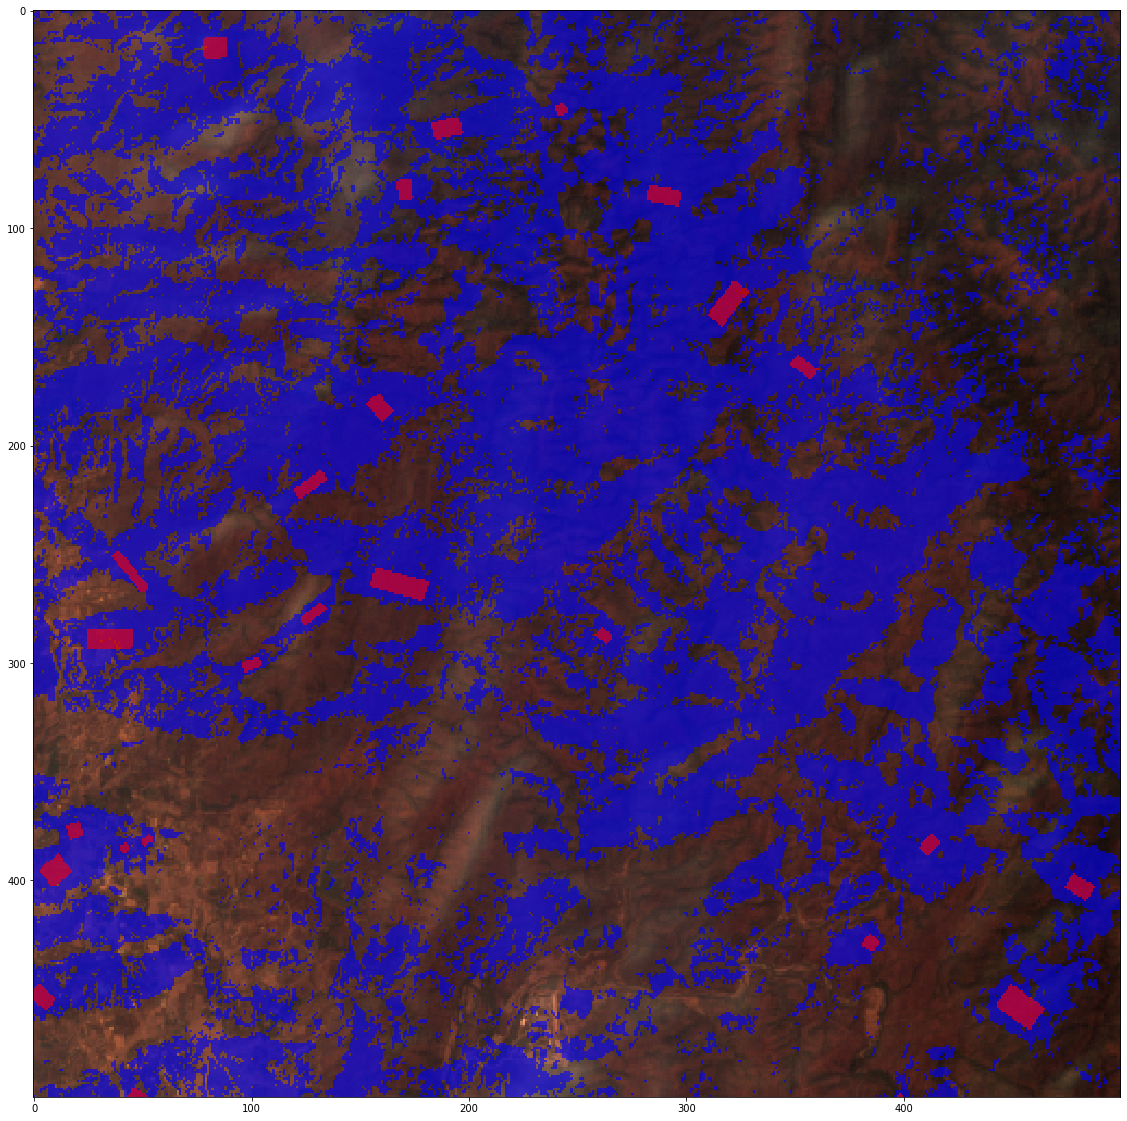

In [51]:
TEST_RASTER = SEC_1_TEST_RASTER ## ภาพที่นำมาเป็นพื้นหลัง โดยจะต้องเลือกให้ตรงกับภาพที่ใช้ทดสอบ

plt.figure(figsize=(20,20))
rgb = np.moveaxis(np.stack([TEST_RASTER[2], TEST_RASTER[1], TEST_RASTER[0]]), 0, -1)
Image = rgb/np.amax(rgb)
Image = np.clip(Image, 0, 1)

plt.imshow(Image, interpolation='none')  

plt.imshow(
    np.array(_PRED).reshape(500,500), 
    vmin=0, 
    vmax=1, 
    cmap=ListedColormap(['#ffffff00', 'blue']), 
    interpolation='none' , 
    alpha=0.6
)

plt.imshow(
    np.array(TEST_Y).reshape(500,500), 
    vmin=0, 
    vmax=1, 
    cmap=ListedColormap(['#ffffff00', 'red']), 
    interpolation='none' , 
    alpha=0.6
)

# 3. หาคุณลักษณะสําคัญของโมเดล

## SHAP (SHapley Additive exPlanations)

In [52]:
Selected_model

### กำหนดตัวอธิบายโมเดล (Explainer)

In [53]:
explainer = [] ## ใช้ Explainer ของ SHAP ในการอธิบายการทำนายของโมเดล
if not str(Selected_model).find('KNeighborsClassifier') == -1 or not str(Selected_model).find('svm') == -1:
    explainer = shap.KernelExplainer(Selected_model.predict,TEST_X[:1000]) ## กำหนดปริมาณของข้อมูลในการประเมินเนื่องจากระยะเวลาในการประมวลผล
    
else:
    explainer = shap.TreeExplainer(Selected_model)

### คำนวณค่า Shapley ของชุดข้อมูลจาก Explainer

In [54]:
shap_values = explainer.shap_values(NORM_DF_SET.iloc[:, 0:len(NORM_DF_SET.columns)-1].values) ## คำนวณค่า Shapley 

### แยกค่า Shapley ของแต่ละคำตอบ

In [55]:
shapv_0 = pd.DataFrame(shap_values[0]) ## ค่า Shapley สำหรับคำตอบที่เป็น Unburn
shapv_1 = pd.DataFrame(shap_values[1]) ## ค่า Shapley สำหรับคำตอบที่เป็น Burnt

## เปลี่ยนชื่อ Features

In [56]:
for _ in range(0,len(NORM_DF_SET.columns)-1):
    shapv_0 = shapv_0.rename(columns={_: NORM_DF_SET.columns[_]})
    shapv_1 = shapv_1.rename(columns={_: NORM_DF_SET.columns[_]})

## ลำดับคุณลักษณะที่มีนัยสำคัญในการทำนายผล

### คำตอบที่เป็น Unburn

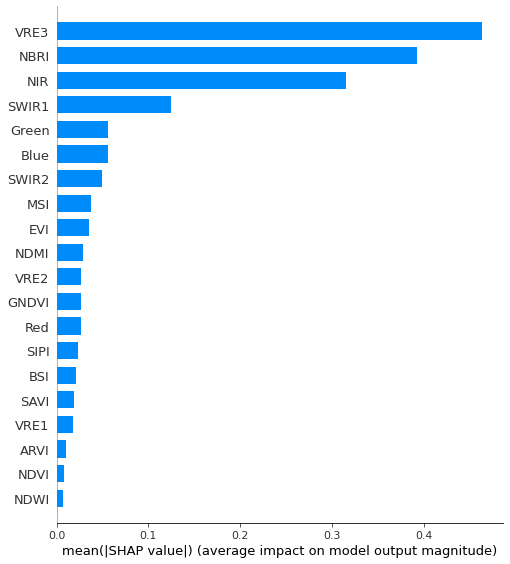

In [57]:
 shap.summary_plot(shapv_0, NORM_DF_SET.drop(columns=['Label']), plot_type="bar")

### คำตอบที่เป็น Burnt

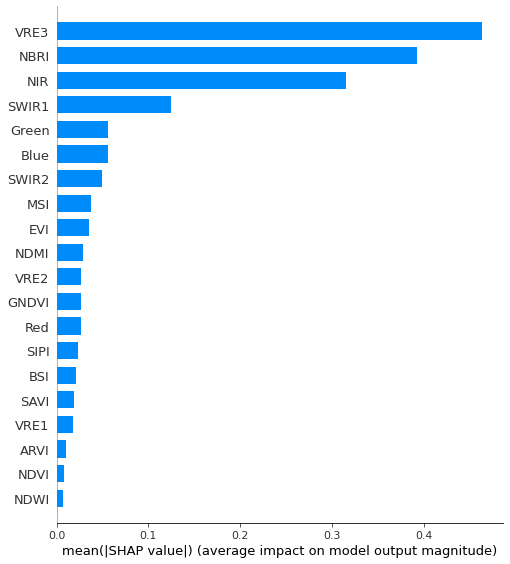

In [58]:
 shap.summary_plot(shapv_1, NORM_DF_SET.drop(columns=['Label']), plot_type="bar")

## แนวโน้มค่า Shapley ของคุณลักษณะ

### คำตอบที่เป็น Unburn

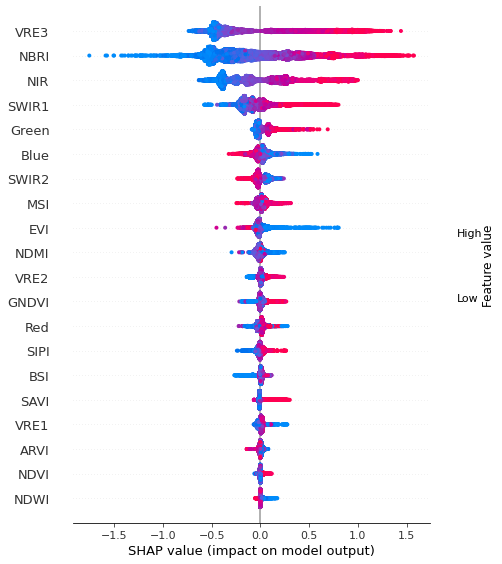

In [59]:
shap.summary_plot(shap_values[0], NORM_DF_SET.drop(columns=['Label']))

### คำตอบที่เป็น Burnt

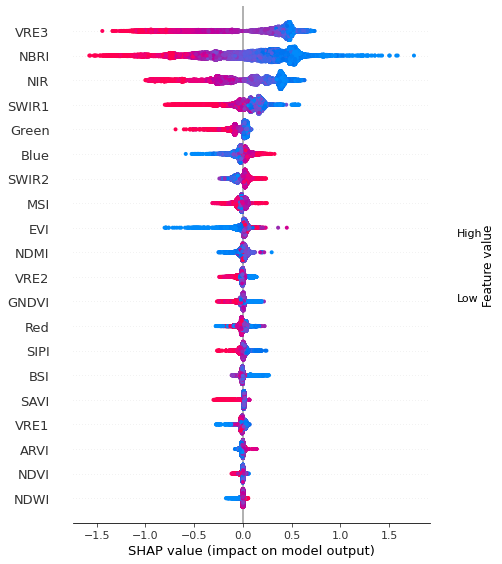

In [60]:
shap.summary_plot(shap_values[1], NORM_DF_SET.drop(columns=['Label']))

# 4. การฝึกฝนโมเดลด้วยคุณลักษณะสําคัญ

### กำหนดฟีเจอร์ที่ต้องการใช้ในการฝึกฝนใหม่

In [61]:
sig_feature = [
    'Blue',
    'Green',
#    'Red',
#    'VRE1',
#    'VRE2',
    'VRE3',
    'NIR',
    'SWIR1',
#    'SWIR2',
#    'NDVI',
#    'GNDVI',
#    'EVI',
#    'SAVI',
#    'NDMI',
#    'MSI',
    'NBRI',
#    'BSI',
#    'NDWI',
#    'ARVI',
    'Label'
]

### สร้าง DataFrame สำหรับฝึกฝนจากฟีเจอร์ที่เลือกใหม่

In [62]:
NEW_DF_SET = NORM_DF_SET.loc[:,sig_feature]
display(NEW_DF_SET)

,Blue,Green,VRE3,NIR,SWIR1,NBRI,Label
0,1.258066,1.817023,1.152816,0.685997,1.609575,-0.742960,1
1,-1.272157,-0.889989,0.998252,1.124686,0.667120,1.112989,0
2,1.764110,1.400560,-0.470098,-0.442062,-0.027321,-0.659642,1
3,0.245977,0.567633,0.998252,1.124686,1.758383,-0.280920,0
4,-0.766112,-0.057062,1.693787,1.626046,1.113546,0.557917,0
...,...,...,...,...,...,...,...
19163,-0.766112,-0.681757,0.302718,0.372647,0.270297,0.197980,0
19164,0.752021,0.359401,0.148155,-0.066043,0.419105,-0.564995,1
19165,-0.260068,-0.265294,-0.547379,-0.567402,-0.771364,0.258639,1
19166,1.005044,0.775865,-0.006408,-0.128713,0.369502,-0.685769,1


### สร้าง DataFrame สำหรับทดสอบ

In [63]:
NEW_TEST_DF_SET = NORM_SEC_3_TEST_DF.loc[:,sig_feature]
display(NEW_TEST_DF_SET)

,Blue,Green,VRE3,NIR,SWIR1,NBRI,Label
0,1.666769,1.999826,-0.051391,0.781528,2.398537,-1.215865,0
1,1.666769,1.726306,-0.120839,0.661892,2.398537,-1.246952,0
2,1.666769,1.726306,-0.120839,0.063711,2.082685,-1.511811,0
3,1.831563,1.726306,0.087503,0.302983,2.161648,-1.287082,0
4,1.831563,1.726306,0.018056,0.302983,2.161648,-1.099808,0
...,...,...,...,...,...,...,...
249995,-2.123505,-1.829456,1.407001,0.183347,-0.917913,0.452892,0
249996,-2.123505,-1.829456,0.712529,0.841346,-0.720505,1.072984,0
249997,-2.288300,-1.829456,1.476449,0.123529,-1.075839,1.037460,0
249998,-2.123505,-1.829456,0.643081,0.661892,-1.115321,1.349504,0


## แยกผลเฉลยออกจาก DataFrame

### ชุดฝึกฝน

In [64]:
NEW_X = NEW_DF_SET.iloc[:, 0:len(NEW_DF_SET.columns)-1].values
NEW_Y = NEW_DF_SET.iloc[:, len(NEW_DF_SET.columns)-1].values

### ชุดทดสอบ

In [65]:
NEW_TEST_X = NEW_TEST_DF_SET.iloc[:, 0:len(NEW_TEST_DF_SET.columns)-1].values
NEW_TEST_Y = NEW_TEST_DF_SET.iloc[:, len(NEW_TEST_DF_SET.columns)-1].values

## ทดสอบโมเดล

In [66]:
_PRED = []

if not str(Selected_model).find('lightgbm') == -1:
    lgbm_train_set = lgb.Dataset(NEW_X, label=NEW_Y)

    new_clf = lgb.train(
        params,
        lgbm_train_set,
        lgbm_epocs
        )
    _PRED = new_clf.predict(NEW_TEST_X)
    _PRED = np.argmax(_PRED, axis=1)
else:
    new_clf = Selected_model.fit(NEW_X)
    _PRED = Selected_model.predict(NEW_TEST_X)
    
print(f"Accuracy: {accuracy_score(NEW_TEST_Y, _PRED)*100} %")
print(classification_report(NEW_TEST_Y, _PRED))

print('\nConfusion matrix:')
mt = metrics.confusion_matrix(NEW_TEST_Y, _PRED)
print(mt)

Accuracy: 57.1268 %
              precision    recall  f1-score   support

           0       1.00      0.57      0.72    247750
           1       0.02      0.95      0.04      2250

    accuracy                           0.57    250000
   macro avg       0.51      0.76      0.38    250000
weighted avg       0.99      0.57      0.72    250000


Confusion matrix:
[[140686 107064]
 [   119   2131]]


## แสดงการทำนายผลบนภาพสีผสมจริง

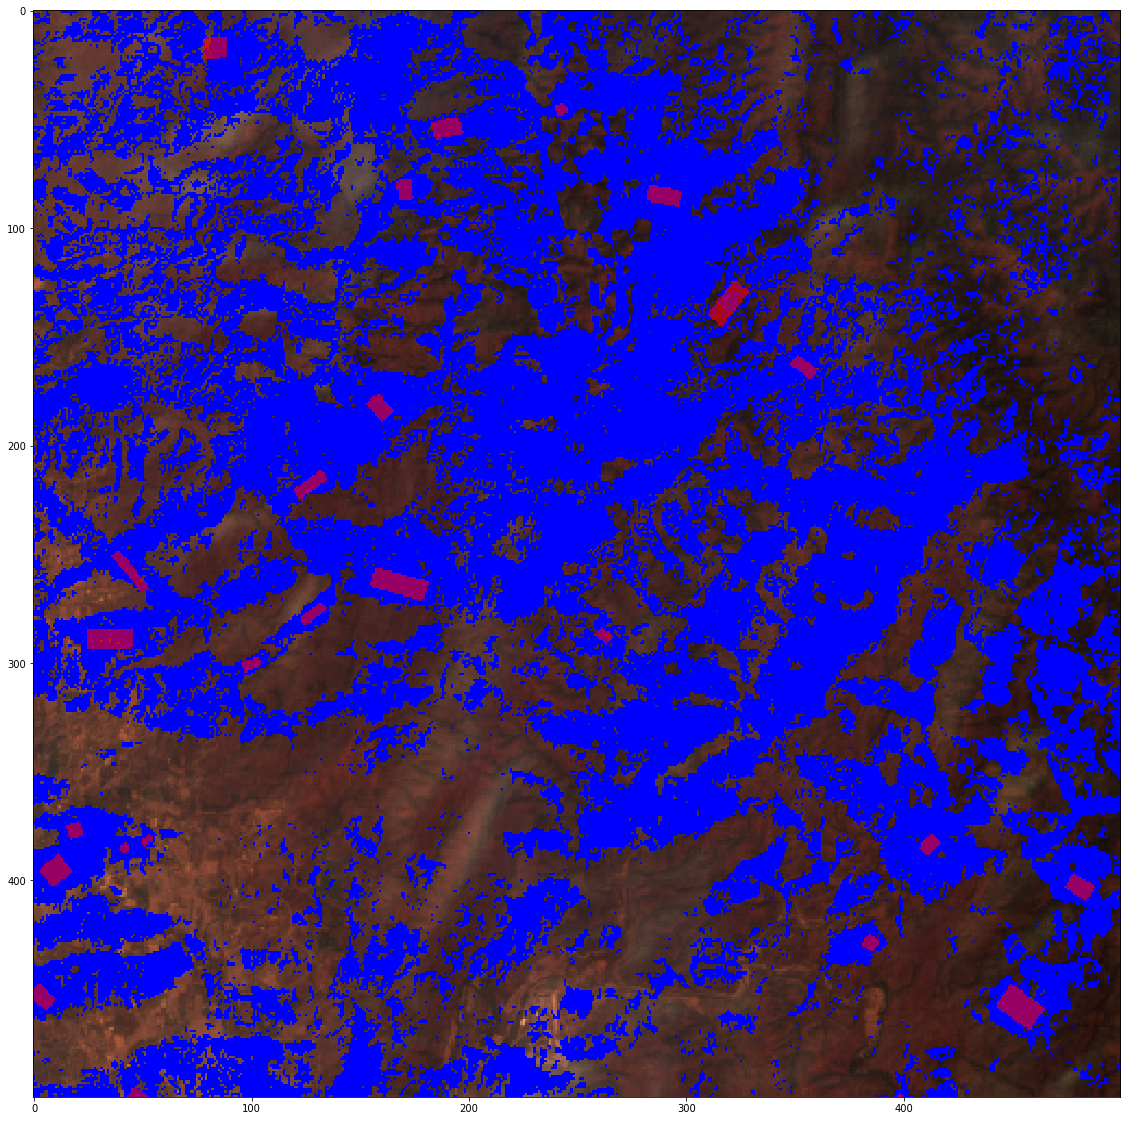

In [67]:
TEST_RASTER = SEC_1_TEST_RASTER

plt.figure(figsize=(20,20))
rgb = np.moveaxis(np.stack([TEST_RASTER[2], TEST_RASTER[1], TEST_RASTER[0]]), 0, -1)
Image = rgb/np.amax(rgb)
Image = np.clip(Image, 0, 1)

plt.imshow(Image, interpolation='none')  

plt.imshow(
    np.array(_PRED).reshape(500,500), 
    vmin=0, 
    vmax=1, 
    cmap=ListedColormap(['#ffffff00', 'blue']), 
    interpolation='none' , 
    alpha=1
)

plt.imshow(
    np.array(NEW_TEST_Y).reshape(500,500), 
    vmin=0, 
    vmax=1, 
    cmap=ListedColormap(['#ffffff00', 'red']), 
    interpolation='none' , 
    alpha=0.6
)